# Method 1 - Neural Network

c:\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\speed\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\speed\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()

591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.7861 - loss: 0.7112 - val_accuracy: 0.9186 - val_loss: 0.2685
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


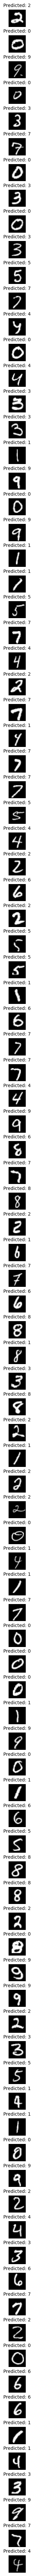

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocess the data
X_train = train_data.drop('label', axis=1).values.astype('float32') / 255.0
y_train = train_data['label'].values
X_test = test_data.values.astype('float32') / 255.0

# Reshape input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Data augmentation
# Helps improve the model's generalization and robustness
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Convolutional neural network (CNN) model using TensorFlow's Keras API
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Creates a 2D convolutional layer with 32 filters/kernels of size 3x3
    tf.keras.layers.BatchNormalization(), # Normalizes the activations of the previous layer, improving training speed and stability
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Creates another 2D convolutional layer with 64 filters/kernels of size 3x3
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(2, 2), # Performs max pooling with a pool size of 2x2, reducing the spatial dimensions of the input
    tf.keras.layers.Dropout(0.25), # Randomly sets a fraction (25%) of the input units to 0 at each update during training, which helps prevent overfitting
    tf.keras.layers.Flatten(), # Flattens the input, converting it into a 1D array, which is required before passing it to a fully connected (dense) layer
    tf.keras.layers.Dense(128, activation='relu'), # Adds a fully connected layer with 128 neurons
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5), # Randomly sets a fraction (50%) of the input units to 0 at each update during training
    tf.keras.layers.Dense(10, activation='softmax') # Outputs probability scores for each class
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Increasing Epoch can potenially increase accuracy up to a certain point
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=1, validation_data=(X_val, y_val))

# Make predictions on test data
predictions = np.argmax(model.predict(X_test), axis=1)

# Create submission DataFrame
submission_df = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_neuralNetwork.csv', index=False)


# Plotting images
num_images = 100
plt.figure(figsize=(20, 100))  # Adjusting figure size
for i in range(num_images):
    plt.subplot(num_images, 1, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i]}', fontsize=10)  # Adjusting title font size
    plt.axis('off')
    if i != num_images - 1:
        plt.subplots_adjust(hspace=0.5)  # Adjusting gap between images
plt.show()



# Method 2 - SVM

In [2]:
# Import necessary libraries
import numpy as np  # Importing NumPy for numerical operations
from sklearn.datasets import fetch_openml  # Importing function to fetch dataset
from sklearn.model_selection import train_test_split  # Importing function to split data
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import accuracy_score  # Importing function to calculate accuracy

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)  # Loading MNIST dataset
X, y = mnist['data'], mnist['target']  # Separating features and labels

# Convert string labels to integers
y = y.astype(np.uint8)  # Converting label data type to unsigned 8-bit integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting data into train and test sets

# Scale the features
X_train_scaled = X_train / 255.0  # Scaling training features
X_test_scaled = X_test / 255.0  # Scaling testing features

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)  # Initializing Support Vector Classifier with Radial Basis Function kernel

# Train the SVM classifier
svm_clf.fit(X_train_scaled, y_train)  # Training the Support Vector Classifier

# Make predictions on the test set
y_pred = svm_clf.predict(X_test_scaled)  # Making predictions on the scaled test set

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy of predictions
print("Accuracy:", accuracy)  # Printing the accuracy


Accuracy: 0.9764285714285714
